<a href="https://colab.research.google.com/github/kalaiyarasan105/Iris-classification-with-KNN/blob/main/Iris_classification_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


Load the dataset

In [ ]:
iris = load_iris()


Convert to DataFrame

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

Explore the data

In [ ]:
print("First 5 rows:")
print(df.head())

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


Visualize the data

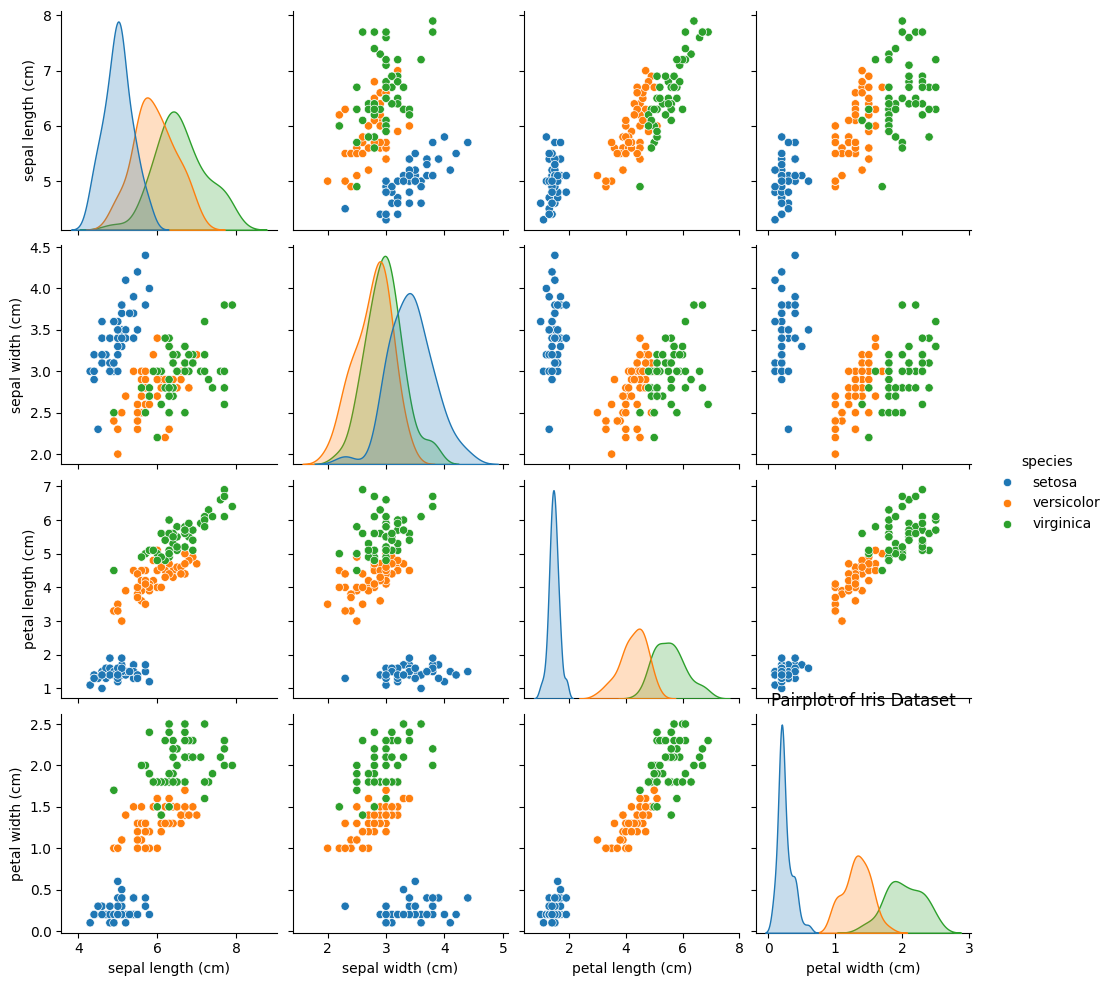

In [ ]:
sns.pairplot(df, hue="species")
plt.title("Pairplot of Iris Dataset")
plt.show()

Split the dataset

In [ ]:
X = df[iris.feature_names]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Apply KNN

In [ ]:
k = 3  # Start with k=3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

Predict and evaluate

In [ ]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {acc:.2f}")



Accuracy Score: 1.00


Confusion Matrix

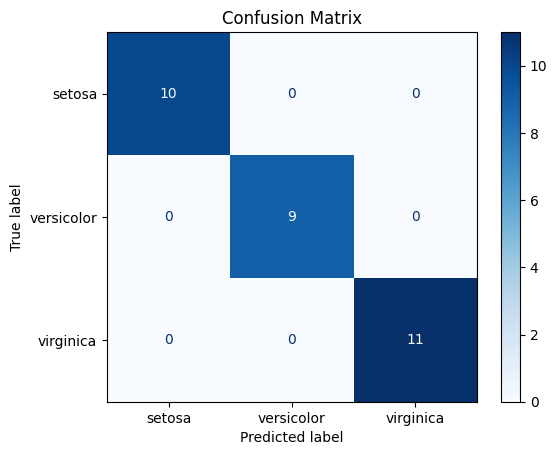

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
